In [3]:
import time
import collections
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as mpatches
import seaborn as sns
import warnings
import xgboost as xgb
from scipy import interp

from collections import Counter
from sklearn import metrics, preprocessing, linear_model
from sklearn.metrics import (
    roc_auc_score, roc_curve, precision_score, recall_score,
    f1_score, accuracy_score, classification_report
)
from sklearn.model_selection import (
    train_test_split, KFold, GridSearchCV, StratifiedKFold
)
from sklearn.manifold import TSNE
from sklearn.preprocessing import PowerTransformer, RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.metrics import classification_report_imbalanced
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler

warnings.filterwarnings('ignore')

In [4]:
#pip install imblearn

In [5]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# Drop the 'Time' column from the DataFrame
df = df.drop("Time", axis=1)
df.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
# Assign the 'Class' column as the target variable y
y = df["Class"]

# Create the feature matrix X by dropping the 'Class' column
X = df.drop("Class", axis=1)

# Print the shapes of y and X
print("Shape of y:", y.shape)
print("Shape of X:", X.shape)


Shape of y: (284807,)
Shape of X: (284807, 29)


In [8]:
# Splitting the data into 80:20 train test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (227845, 29)
Shape of X_test: (56962, 29)
Shape of y_train: (227845,)
Shape of y_test: (56962,)


In [9]:
print("Fraudulent Count for Full data:", np.sum(y))
print("Fraudulent Count for Train data:", np.sum(y_train))
print("Fraudulent Count for Test data:", np.sum(y_test))


Fraudulent Count for Full data: 492
Fraudulent Count for Train data: 394
Fraudulent Count for Test data: 98


In [10]:
X_test_saved = X_test.copy()
y_test_saved = y_test.copy()
print("Testing set saved for evaluation.")


Testing set saved for evaluation.


In [11]:
# Initialize the RobustScaler
scaler = RobustScaler()

# Scaling the "Amount" feature in the training data
X_train[["Amount"]] = scaler.fit_transform(X_train[["Amount"]])

# Scaling the "Amount" feature in the test data
X_test[["Amount"]] = scaler.transform(X_test[["Amount"]])

# Calculate skewness of features
var = X_train.columns
skewness_list = []
for col in var:
    skewness_list.append(X_train[col].skew())

# Create a DataFrame to store skewness values
skewness_df = pd.DataFrame({"Features": var, "Skewness": skewness_list})
skewness_df.set_index("Features", inplace=True)
skewness_df

# Identify skewed features
skewed_features = skewness_df[(skewness_df["Skewness"] > 1) | (skewness_df["Skewness"] < -1)].index
skewed_features.tolist()

# Importing the required library
from sklearn import preprocessing

# Instantiate the PowerTransformer
pt = preprocessing.PowerTransformer(method='yeo-johnson', copy=True)

# Fit and transform the training data
X_train_pt = pt.fit_transform(X_train)
y_train_pt = y_train

# Transform the test data using the same transformer
X_test_pt = pt.transform(X_test)
y_test_pt = y_test


In [12]:
# Display the power-transformed features
print(X_train_pt)


[[ 1.33618788 -0.54484524 -0.96560586 ...  0.18226012 -0.09086395
  -0.84312016]
 [ 1.42577426 -0.11673724 -1.77657609 ... -0.00550109 -0.20559691
  -1.07812706]
 [-0.75438698  0.33048345  0.39988107 ...  0.08314307  0.57984412
   1.43122753]
 ...
 [ 0.52096648 -0.03765332  0.22167732 ...  0.06556876  0.08664086
   0.39825955]
 [ 0.70400402  0.11684072  0.09210173 ... -0.1603766  -0.00883583
  -1.20086971]
 [-0.57696779  0.45583121  1.4321219  ...  0.94608931  0.64393801
  -0.86019457]]


In [13]:
# Conducting cross-validation for both X_train and y_train datasets.
# Initialize a StratifiedKFold cross-validator for performing cross-validation.

num_splits = 3
random_state = None
shuffle_data = False  # The shuffling of data is disabled by setting shuffle to False in order to maintain consistent results during cross-validation.

skf = StratifiedKFold(n_splits=num_splits, random_state=random_state, shuffle=shuffle_data)


==================================== Evaluating Random Forest Model =======================================
Evaluating model with n_estimators = 10...
Training set indices: [ 75936  75937  75938 ... 227842 227843 227844], Validation set indices: [    0     1     2 ... 83545 84117 84974]
Time taken for this iteration: 22.39 seconds
Training set indices: [     0      1      2 ... 227842 227843 227844], Validation set indices: [ 75936  75937  75938 ... 153006 153116 153683]
Time taken for this iteration: 24.56 seconds
Training set indices: [     0      1      2 ... 153006 153116 153683], Validation set indices: [151894 151895 151896 ... 227842 227843 227844]
Time taken for this iteration: 21.83 seconds
Average ROC-AUC for training data = 1.0000
Average ROC-AUC for validation data = 0.9286
------------------------------------------------------------------------------------------------------------
Evaluating model with n_estimators = 50...
Training set indices: [ 75936  75937  75938 ... 227

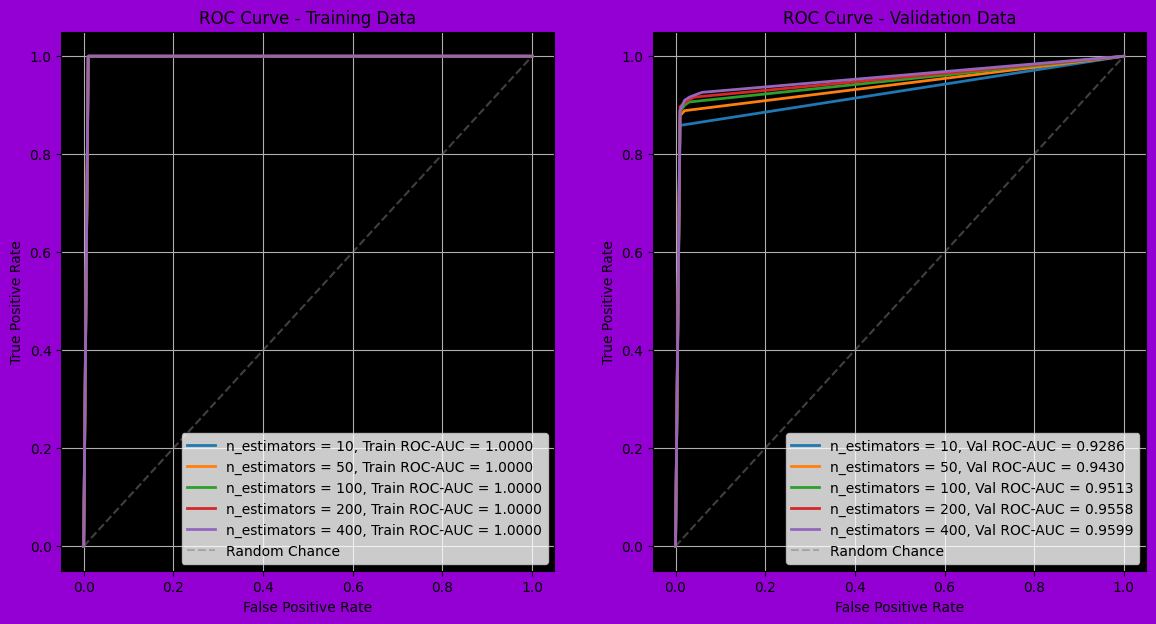



============================== Best Hyperparameters and Corresponding Scores ================================
Average ROC-AUC scores for training data across all n_estimators values: [0.9999994180819173, 1.0, 1.0, 1.0, 1.0]
Average ROC-AUC scores for validation data across all n_estimators values: [0.9285802566339737, 0.9430235811070508, 0.9513356594588477, 0.9557869564111368, 0.959867514018696]
Optimal n_estimators: 400
Highest average ROC-AUC score for validation data: 0.9599




In [11]:
print("============================================================================================================")
print("==================================== Evaluating Random Forest Model =======================================")

# Set hyperparameter values for tuning
n_estimators_values = [10, 50, 100, 200, 400]

# Lists to store the average ROC-AUC scores for both training and validation datasets
avg_roc_auc_train = []
avg_roc_auc_val = []
avg_false_positive_rate = np.linspace(0, 1, 100)

# Create plots for visualizing the ROC curves
fig, (ax_train, ax_val) = plt.subplots(1, 2, figsize=(14, 7), facecolor='darkviolet')

# Customize the background colors
ax_train.set_facecolor('black')
ax_val.set_facecolor('black')

# Tune the hyperparameter n_estimators using cross-validation
for n in n_estimators_values:
    print(f"Evaluating model with n_estimators = {n}...")
    train_scores = []
    val_scores = []
    train_fprs = []
    train_tprs = []
    val_fprs = []
    val_tprs = []

    # Cross-validation loop
    for train_idx, val_idx in skf.split(X_train_pt, y_train_pt):
        timer_start = time.time()
        print(f"Training set indices: {train_idx}, Validation set indices: {val_idx}")

        X_cv_train, X_cv_val = X_train_pt[train_idx], X_train_pt[val_idx]
        y_cv_train, y_cv_val = y_train_pt.iloc[train_idx], y_train_pt.iloc[val_idx]

        rf_model = RandomForestClassifier(n_estimators=n)
        rf_model.fit(X_cv_train, y_cv_train)

        y_train_proba = rf_model.predict_proba(X_cv_train)
        train_score = roc_auc_score(y_true=y_cv_train, y_score=y_train_proba[:, 1])
        train_scores.append(train_score)

        y_val_proba = rf_model.predict_proba(X_cv_val)
        val_score = roc_auc_score(y_true=y_cv_val, y_score=y_val_proba[:, 1])
        val_scores.append(val_score)

        train_fpr, train_tpr, _ = roc_curve(y_true=y_cv_train, y_score=y_train_proba[:, 1])
        train_tprs.append(interp(avg_false_positive_rate, train_fpr, train_tpr))
        train_tprs[-1][0] = 0.0
        train_fprs.append(train_fpr)

        val_fpr, val_tpr, _ = roc_curve(y_true=y_cv_val, y_score=y_val_proba[:, 1])
        val_tprs.append(interp(avg_false_positive_rate, val_fpr, val_tpr))
        val_tprs[-1][0] = 0.0
        val_fprs.append(val_fpr)
        
        timer_end = time.time() - timer_start
        print(f"Time taken for this iteration: {timer_end:.2f} seconds")

    # Compute average scores
    avg_roc_auc_train.append(np.mean(train_scores))
    avg_roc_auc_val.append(np.mean(val_scores))

    print(f"Average ROC-AUC for training data = {avg_roc_auc_train[-1]:.4f}")
    print(f"Average ROC-AUC for validation data = {avg_roc_auc_val[-1]:.4f}")
    print("------------------------------------------------------------------------------------------------------------")

    # Plot the ROC curves
    ax_train.plot(avg_false_positive_rate, np.mean(train_tprs, axis=0), linestyle='-', lw=2, label=f"n_estimators = {n}, Train ROC-AUC = {avg_roc_auc_train[-1]:.4f}")
    ax_val.plot(avg_false_positive_rate, np.mean(val_tprs, axis=0), linestyle='-', lw=2, label=f"n_estimators = {n}, Val ROC-AUC = {avg_roc_auc_val[-1]:.4f}")

print("================================== Random Forest Evaluation Complete ======================================")
print("\n")
print("============================== Visualization: ROC Curves for Training & Validation ==========================")
print("\n")

# Add reference line to ROC plots
ax_train.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Chance', alpha=0.5)
ax_val.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Chance', alpha=0.5)

# Customize plot attributes
ax_train.set_xlabel('False Positive Rate')
ax_train.set_ylabel('True Positive Rate')
ax_train.set_title('ROC Curve - Training Data')
ax_train.legend(loc="lower right")
ax_train.grid(True)

ax_val.set_xlabel('False Positive Rate')
ax_val.set_ylabel('True Positive Rate')
ax_val.set_title('ROC Curve - Validation Data')
ax_val.legend(loc="lower right")
ax_val.grid(True)

plt.show()

print("============================================================================================================")
print("\n")
print("============================== Best Hyperparameters and Corresponding Scores ================================")

# Display average ROC-AUC scores
print(f"Average ROC-AUC scores for training data across all n_estimators values: {avg_roc_auc_train}")
print(f"Average ROC-AUC scores for validation data across all n_estimators values: {avg_roc_auc_val}")

# Identify the best n_estimators value
best_idx = np.argmax(avg_roc_auc_val)
optimal_n_estimators = n_estimators_values[best_idx]
highest_avg_roc_auc = avg_roc_auc_val[best_idx]

print(f"Optimal n_estimators: {optimal_n_estimators}")
print(f"Highest average ROC-AUC score for validation data: {highest_avg_roc_auc:.4f}")

print("============================================================================================================")
print("\n")
print("============================================================================================================")


In [12]:
# Initialize RandomForestClassifier
forest_model = RandomForestClassifier()

# Specify hyperparameters for optimization
hyperparameters = {
    "n_estimators": [500],
    "min_samples_split": [5, 7],
}

# Capture the current time to calculate duration later
starting_point = time.time()

# Set up GridSearchCV with stratified cross-validation and fit to the data
tuning_model = GridSearchCV(forest_model,
                            param_grid=hyperparameters, 
                            scoring='roc_auc', 
                            cv=skf, 
                            n_jobs=-1,
                            verbose=1,
                            return_train_score=True)
tuning_model.fit(X_train_pt, y_train_pt)

# Calculate total time taken for the grid search
duration = time.time() - starting_point

# Display the time duration, best ROC AUC score and optimal hyperparameters
print(f"Grid search completed in: {duration:.2f} seconds.")
print(f"Top ROC AUC score achieved: {tuning_model.best_score_:.4f}")
print(f"Optimal parameters found: {tuning_model.best_params_}")


Fitting 3 folds for each of 2 candidates, totalling 6 fits
Grid search completed in: 4021.48 seconds.
Top ROC AUC score achieved: 0.9612
Optimal parameters found: {'min_samples_split': 5, 'n_estimators': 500}


In [13]:
results = tuning_model.cv_results_

# Display average test scores for each set of hyperparameters
print("Average test scores across folds:")
for score, parameters in zip(results["mean_test_score"], results["params"]):
    print(f"For {parameters}, Average Score: {score:.4f}")

# Showcase the ranking of hyperparameter combinations based on their performance
print("\nHyperparameter combination rankings:")
for position, parameters in enumerate(results["params"], start=1):
    print(f"Position {position}: {parameters}")

# Share the variability in test scores for each hyperparameter set
print("\nTest score variability:")
for deviation, parameters in zip(results["std_test_score"], results["params"]):
    print(f"For {parameters}, Score Deviation: {deviation:.4f}")


Average test scores across folds:
For {'min_samples_split': 5, 'n_estimators': 500}, Average Score: 0.9612
For {'min_samples_split': 7, 'n_estimators': 500}, Average Score: 0.9580

Hyperparameter combination rankings:
Position 1: {'min_samples_split': 5, 'n_estimators': 500}
Position 2: {'min_samples_split': 7, 'n_estimators': 500}

Test score variability:
For {'min_samples_split': 5, 'n_estimators': 500}, Score Deviation: 0.0086
For {'min_samples_split': 7, 'n_estimators': 500}, Score Deviation: 0.0048


In [14]:
# Initialize the SMOTE resampler with a given random state
smote = over_sampling.SMOTE(random_state=0)

# Apply the resampling to the training data
X_smote_train_pt, y_smote_train_pt = smote.fit_resample(X_train_pt, y_train_pt)

=======================================Running Random Forest Classifier=====================================
Testing with n_estimators = 100
Training indices: [ 75936  75937  75938 ... 454899 454900 454901] | Validation indices: [     0      1      2 ... 303265 303266 303267]
Execution time: 242.79 seconds
Training indices: [     0      1      2 ... 454899 454900 454901] | Validation indices: [ 75936  75937  75938 ... 379082 379083 379084]
Execution time: 250.28 seconds
Training indices: [     0      1      2 ... 379082 379083 379084] | Validation indices: [151894 151895 151896 ... 454899 454900 454901]
Execution time: 249.13 seconds
ROC-AUC Score (Validation): 0.9999962164792752
------------------------------------------------------------------------------------------------------------
Testing with n_estimators = 200
Training indices: [ 75936  75937  75938 ... 454899 454900 454901] | Validation indices: [     0      1      2 ... 303265 303266 303267]
Execution time: 498.72 seconds
Tra

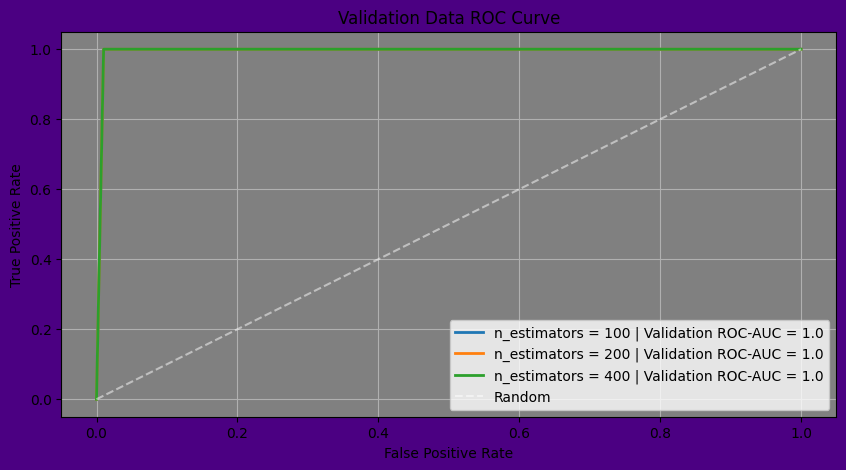

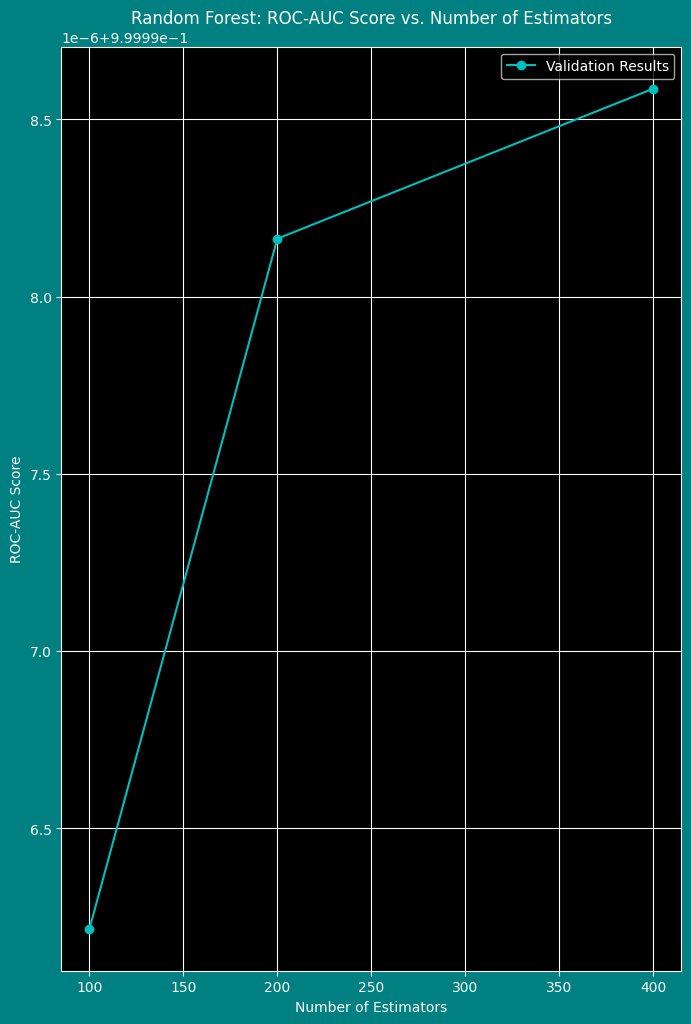



========================Identifying Best Performing Hyperparameters and Scores==========================
ROC-AUC Scores (Validation) for all Estimator Values: 
 [0.9999962164792752, 0.99999816343066, 0.9999985865763287]
Optimal Number of Estimators: 400
Top ROC-AUC Score (Validation): 0.9999985865763287
------------------------------------------------------------------------------------------------------------
===============================End of Hyperparameter Optimization Process=================================
------------------------------------------------------------------------------------------------------------




In [15]:
print("============================================================================================================")
print("=======================================Running Random Forest Classifier=====================================")

# Specify values for n_estimators
estimator_values = [100, 200, 400]

# Prepare lists to collect mean ROC-AUC scores and false positive rates for validation data
roc_auc_scores_val = []
avg_fpr = np.linspace(0, 1, 100)

# Create a plot for visualization
fig, ax2 = plt.subplots(figsize=(10, 5), facecolor='indigo')
ax2.set_facecolor('grey')

# Iterate over each estimator value
for n in estimator_values:
    print(f"Testing with n_estimators = {n}")
    val_scores = []
    val_fprs = []
    val_tprs = []
    
    # Implement cross-validation
    for train_idx, val_idx in skf.split(X_smote_train_pt, y_smote_train_pt):
        clock_start = time.time()
        print(f"Training indices: {train_idx} | Validation indices: {val_idx}")
        X_cv_train, X_cv_val = X_smote_train_pt[train_idx], X_smote_train_pt[val_idx]
        y_cv_train, y_cv_val = y_smote_train_pt.iloc[train_idx], y_smote_train_pt.iloc[val_idx]

        rf_clf = RandomForestClassifier(n_estimators=n)
        rf_clf.fit(X_cv_train, y_cv_train)

        val_predictions = rf_clf.predict_proba(X_cv_val)
        auc_val = roc_auc_score(y_true=y_cv_val, y_score=val_predictions[:, 1])
        val_scores.append(auc_val)

        fpr_val, tpr_val, _ = roc_curve(y_true=y_cv_val, y_score=val_predictions[:, 1])
        val_tprs.append(interp(avg_fpr, fpr_val, tpr_val))
        val_tprs[-1][0] = 0.0
        val_fprs.append(fpr_val)

        clock_end = time.time()
        print(f"Execution time: {clock_end - clock_start:.2f} seconds")

    # Compute mean ROC-AUC score for validation data
    avg_roc_auc_val = np.mean(val_scores)
    roc_auc_scores_val.append(avg_roc_auc_val)

    print(f"ROC-AUC Score (Validation): {avg_roc_auc_val}")
    print("------------------------------------------------------------------------------------------------------------")

    # Plot the ROC curve for current n_estimators
    ax2.plot(avg_fpr, np.mean(val_tprs, axis=0), linestyle='-', lw=2, label=f'n_estimators = {n} | Validation ROC-AUC = {round(avg_roc_auc_val, 4)}')

print("==========================Random Forest Classifier Completed Successfully!==============================")
print("------------------------------------------------------------------------------------------------------------")
print("=======================================Visualizing the ROC AUC Curve=======================================")

# Display ROC curve for random classifier
ax2.plot([0, 1], [0, 1], linestyle='--', color='white', label='Random', alpha=0.5)
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('Validation Data ROC Curve')
ax2.legend(loc="lower right")
ax2.grid(True)

# Show the plot
plt.show()

print("============================================================================================================")
# Plot ROC-AUC scores vs n_estimators
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='teal')
    plt.plot(estimator_values, roc_auc_scores_val, 'co-')
    plt.xlabel('Number of Estimators')
    plt.ylabel('ROC-AUC Score')
    plt.title('Random Forest: ROC-AUC Score vs. Number of Estimators')
    plt.legend(['Validation Results'], loc='upper right')
    plt.grid()
    plt.show()

print("\n")
print("============================================================================================================")

# Identify and print optimal hyperparameters
print("========================Identifying Best Performing Hyperparameters and Scores==========================")

print(f"ROC-AUC Scores (Validation) for all Estimator Values: \n {roc_auc_scores_val}")

best_idx = np.argmax(roc_auc_scores_val)
optimal_estimators = estimator_values[best_idx]
optimal_roc_auc = roc_auc_scores_val[best_idx]

print(f"Optimal Number of Estimators: {optimal_estimators}")
print(f"Top ROC-AUC Score (Validation): {optimal_roc_auc}")

print("------------------------------------------------------------------------------------------------------------")
print("===============================End of Hyperparameter Optimization Process=================================")
print("------------------------------------------------------------------------------------------------------------")

print("\n")
print("============================================================================================================")


In [16]:
# Setting up hyperparameter candidates for tuning
tuning_params = {
    "n_estimators": [500],
    "min_samples_split": [5, 7]
}

# Initializing the Random Forest classifier
forest_clf = RandomForestClassifier()

# Recording the initial time for performance measurement
start_timestamp = time.time()

# Using GridSearchCV for hyperparameter optimization with stratified cross-validation
optimizer = GridSearchCV(
    forest_clf,
    param_grid=tuning_params,
    scoring='roc_auc',
    cv=skf,
    n_jobs=-1,  # utilizing all available CPU cores
    verbose=1,
    return_train_score=True
)

# Adjusting the model with provided data
optimizer.fit(X_smote_train_pt, y_smote_train_pt)

# Calculating and displaying the time taken for the optimization process
elapsed_time = time.time() - start_timestamp
print(f"Optimization completed in: {elapsed_time:.2f} seconds")

# Displaying the best achieved ROC AUC score
print(f'Top ROC AUC Score: {optimizer.best_score_}')

# Showcasing the best hyperparameters from the tuning
print(f'Optimal Hyperparameters: {optimizer.best_params_}')


Fitting 3 folds for each of 2 candidates, totalling 6 fits
Optimization completed in: 4146.63 seconds
Top ROC AUC Score: 0.9999982450791595
Optimal Hyperparameters: {'min_samples_split': 7, 'n_estimators': 500}


In [17]:
# Retrieve results from the GridSearch
results = optimizer.cv_results_

# Display average test scores for different parameter sets
print("Average Test Scores:")
for score, param_set in zip(results["mean_test_score"], results["params"]):
    print(f"For {param_set}, Score: {score}")

# Show how each parameter set ranks based on the test score
print("\nParameter Set Rankings:")
for position, param_set in enumerate(results["params"], start=1):
    print(f"#{position} - {param_set}")

# Detail the test score variability for each parameter set
print("\nTest Score Variability:")
for deviation, param_set in zip(results["std_test_score"], results["params"]):
    print(f"For {param_set}, Standard Deviation: {deviation}")


Average Test Scores:
For {'min_samples_split': 5, 'n_estimators': 500}, Score: 0.9999981776379628
For {'min_samples_split': 7, 'n_estimators': 500}, Score: 0.9999982450791595

Parameter Set Rankings:
#1 - {'min_samples_split': 5, 'n_estimators': 500}
#2 - {'min_samples_split': 7, 'n_estimators': 500}

Test Score Variability:
For {'min_samples_split': 5, 'n_estimators': 500}, Standard Deviation: 1.1921441157426057e-06
For {'min_samples_split': 7, 'n_estimators': 500}, Standard Deviation: 1.2068095400627545e-06
